In [1]:
%reset
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from fooof import FOOOF
from fooof.plts.templates import plot_spectrum

from neurodsp import sim
from neurodsp import spectral

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


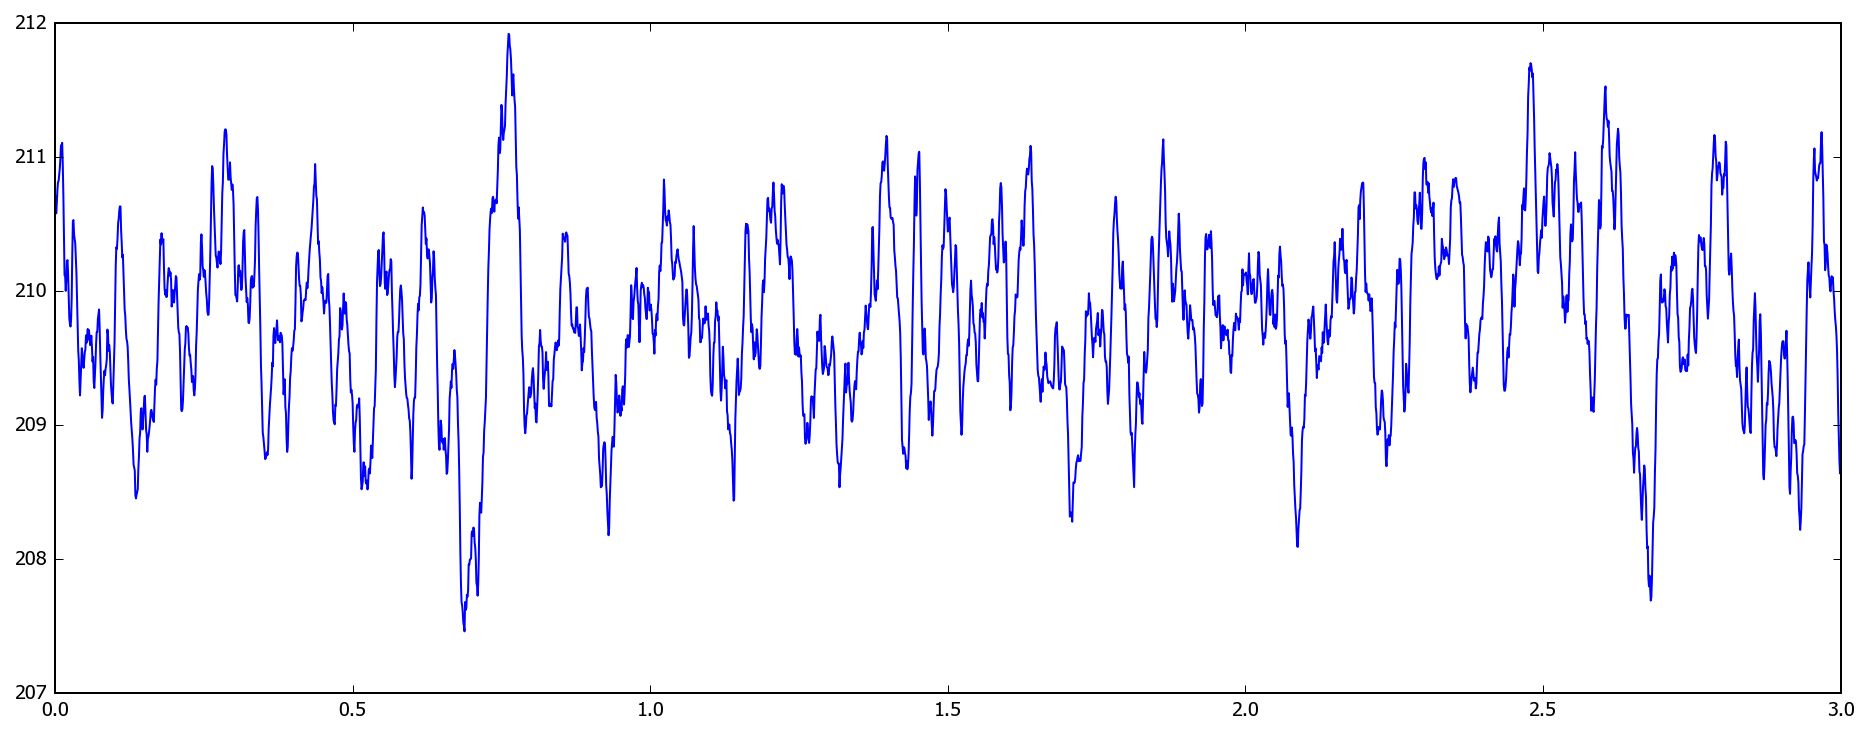

In [5]:
n_seconds = 300
fs = 1000
freq = 10.

noise_generator = 'synaptic'
noise_args = {'n_neurons':1000, 'firing_rate':2., 't_ker':1, 'tau_r':0.002, 'tau_d':0.02}

rdsym = 0.3
ratio_osc_var = 1.
prob_enter_burst = 0.1
prob_leave_burst = 0.9

t = np.arange(0, n_seconds, 1/fs)
data = sim.sim_noisy_bursty_oscillator(n_seconds, fs, freq,
                                       noise_generator, noise_args,
                                       rdsym=rdsym,
                                       ratio_osc_var=ratio_osc_var,
                                       prob_enter_burst=prob_enter_burst,
                                       prob_leave_burst=prob_leave_burst)

plt.plot(t[1:(fs*3)], data[1:(fs*3)])
plt.show()

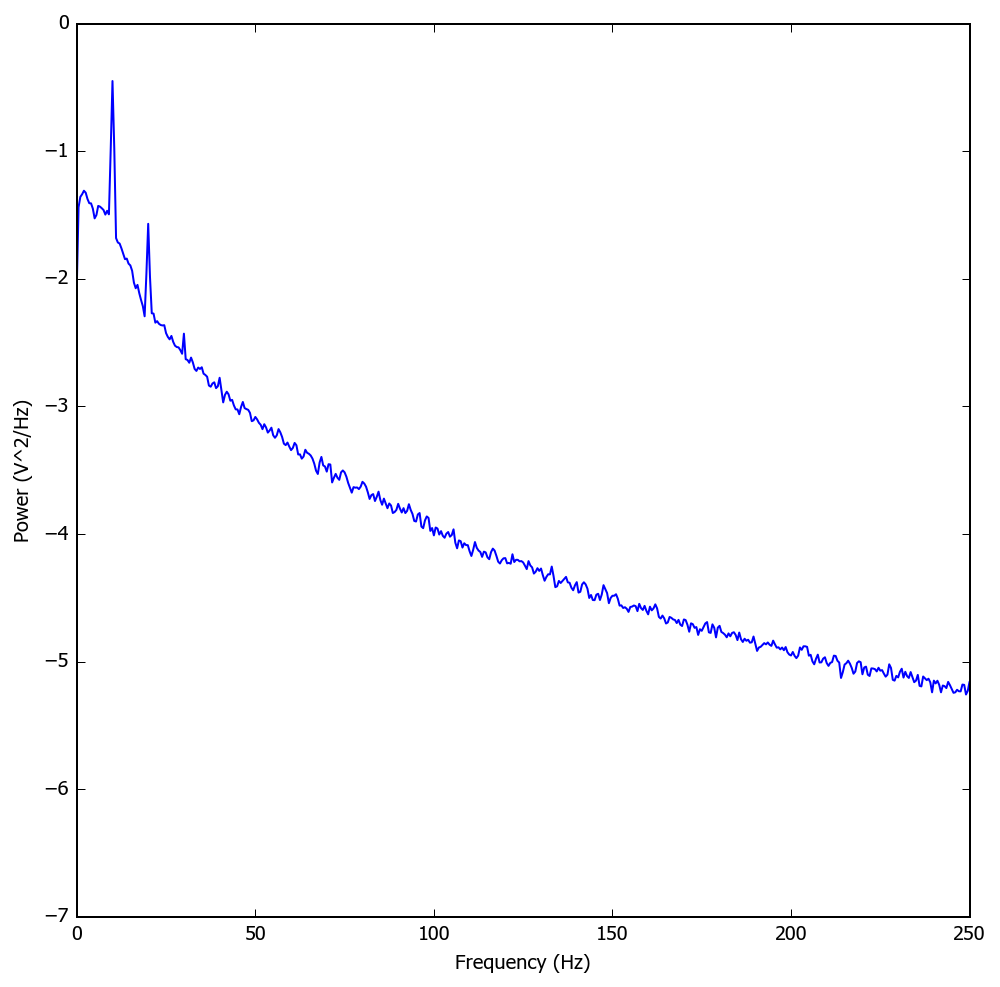

In [105]:
freqs, spectrum = spectral.compute_spectrum(data, fs, method='mean', window='hann', nperseg=fs*2, noverlap=0.5) # mean of spectrogram (Welch)


plt.figure(figsize=(8,8))
plt.plot(freqs, np.log10(spectrum))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((0, 250))
plt.show()




FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



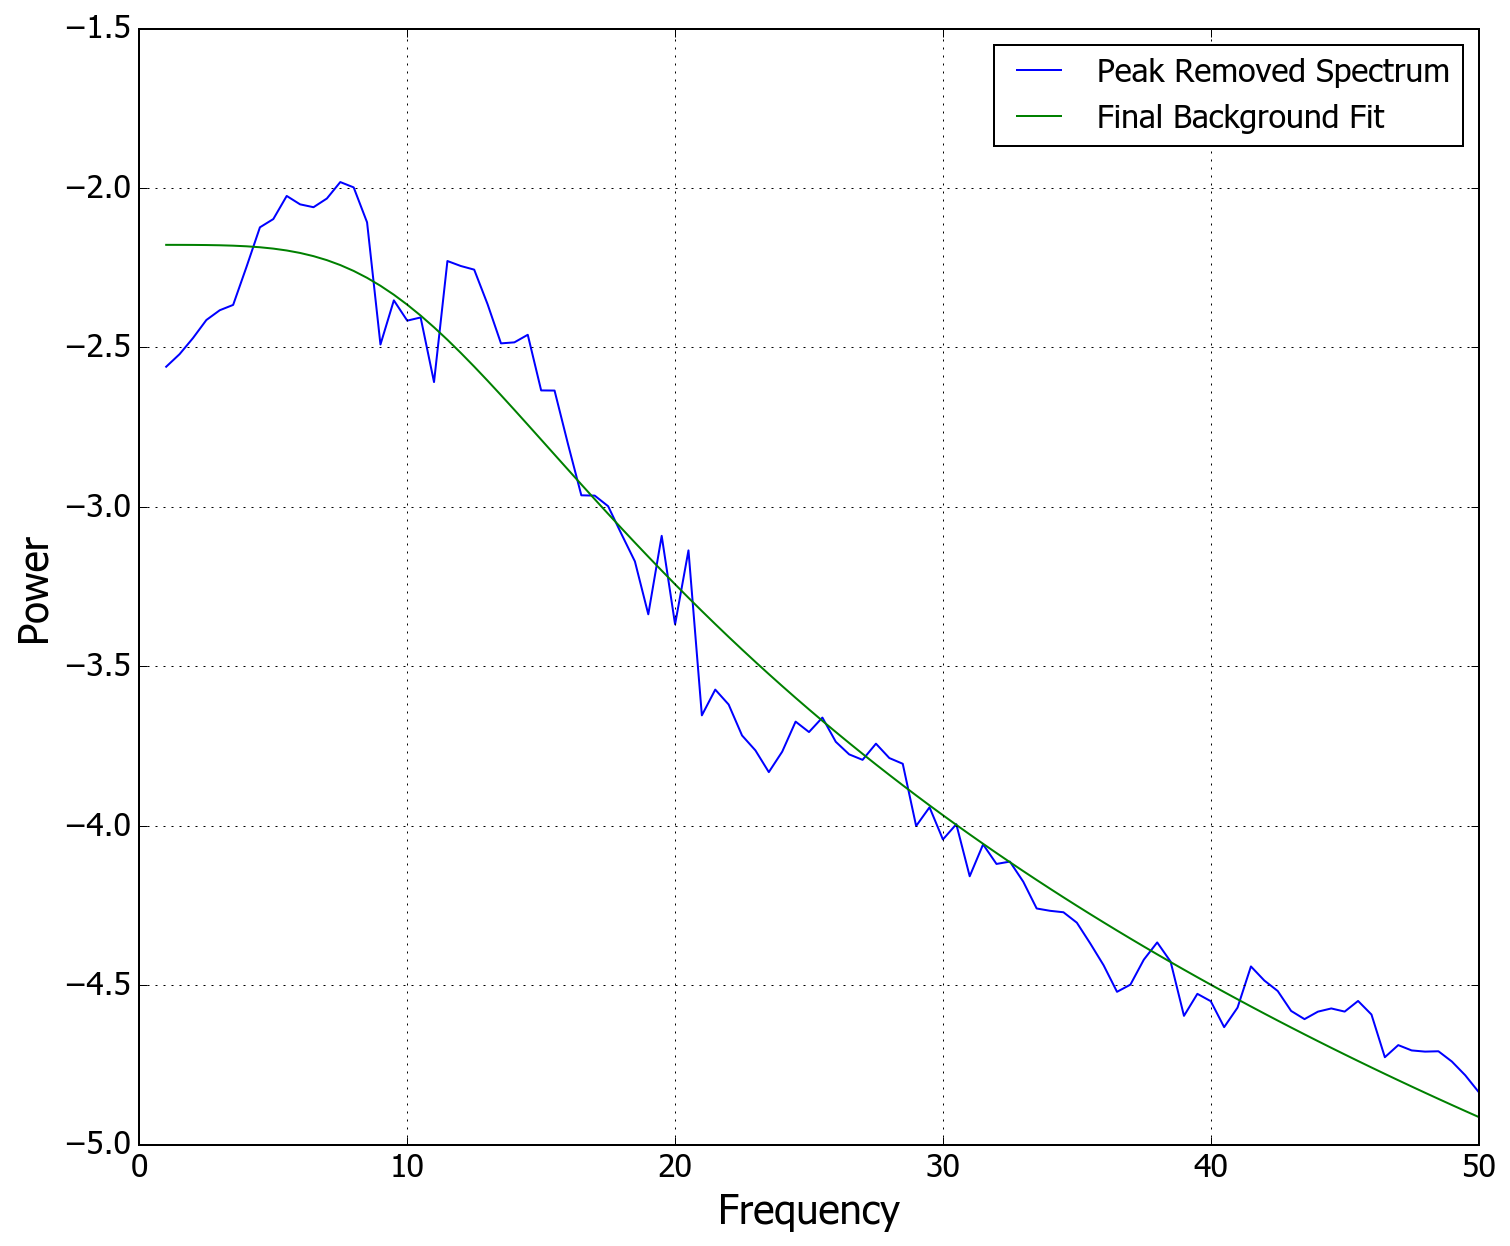

In [95]:
# Initialize FOOOF model
fm = FOOOF()

# Set the frequency range upon which to fit FOOOF
freq_range = [1, 50]

# Initialize FOOOF - setting to aperiodic / background mode to use a knee fit
fm = FOOOF(background_mode='knee')
fm.fit(freqs, spectrum, freq_range)

# aperiodc-only signal
peaks_removed_spectrum = fm._spectrum_peak_rm
aperiodic_fit = fm._bg_fit

# Set whether to plot in log-log space (used across the whole notebook)
plt_log = False

# Fit the final aperiodic 'background' fit on the peak removed power spectrum
_, ax = plt.subplots(figsize=(12, 10))
plot_spectrum(fm.freqs, peaks_removed_spectrum, plt_log, label='Peak Removed Spectrum', ax=ax)
plot_spectrum(fm.freqs, aperiodic_fit, plt_log, label='Final Background Fit', ax=ax)

In [ ]:

# Fit FOOOF model
#  Note that this time we're specifying an optional parameter to plot in log-log
fm.report(freqs, spectrum, [2, 50], plt_log=True)

In [92]:
fres = fm.get_results()
fres

FOOOFResult(background_params=array([2.38339001e+00, 3.64410768e+04, 4.29430616e+00]), peak_params=array([[10.01031704,  1.96732218,  1.16648601],
       [20.00842997,  1.73015468,  0.87397563],
       [30.01514537,  1.29644111,  0.90766303],
       [40.03753932,  1.17881388,  0.97352431]]), r_squared=0.9782227146066594, error=0.125573254052743, gaussian_params=array([[10.01031704,  1.96763   ,  0.58324301],
       [20.00842997,  1.73047665,  0.43698781],
       [30.01514537,  1.29716323,  0.45383151],
       [40.03753932,  1.18232463,  0.48676216]]))

In [70]:
fm._spectrum_peak_rm

array([-2.15288604, -2.09266934, -2.06013169, -2.06411099, -2.05752866,
       -2.03146491, -2.17587174, -2.38081976, -2.69936728, -1.99425714,
       -1.59102807, -2.05415253, -2.9061083 , -2.576445  , -2.41437434,
       -2.33586001, -2.37823337, -2.44272484, -2.45916407, -2.56284193,
       -2.6439962 , -2.7293735 , -2.77575901, -2.88529361, -2.96369938,
       -3.03657008, -3.18685084, -3.43487227, -3.84017327, -2.98361103,
       -2.48831324, -2.95242125, -3.96367125, -3.84321346, -3.80287452,
       -3.76229038, -3.74264472, -3.74524731, -3.74906876, -3.7421193 ,
       -3.72114041, -3.71469609, -3.67831508, -3.72836834, -3.72565552,
       -3.75748116, -3.90032172, -4.06089015, -4.3695112 , -3.92579105,
       -3.50117899, -3.92380067, -4.49274997, -4.30494231, -4.22629417,
       -4.2147593 , -4.21224077, -4.20321669, -4.27328335, -4.28982194,
       -4.32234781, -4.38316195, -4.3942841 , -4.37464225, -4.39591427,
       -4.44219393, -4.50423596, -4.65950055, -4.86351176, -4.50